### Plots to show in Final Docs

In [1]:
import numpy as np
import ta as ta_lib
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.reload_library()

# plt.rcParams.update({
#     "text.usetex": True
# })

# plt.style.use(['science', 'ieee'])

In [2]:
symbols = ['PETR4.SA', 'VALE3.SA']
df = yf.download(symbols, period='1y')['Close']
df = df.loc['2022-01-01': '2022-07-02']

[*********************100%***********************]  2 of 2 completed


In [3]:
PETR4_initial = 100000 / df['PETR4.SA'].values[0]
VALE3_initial = 100000 / df['VALE3.SA'].values[0]

df['PETR4Holdings'] =  PETR4_initial * df['PETR4.SA']
df['VALE3Holdings'] =  VALE3_initial * df['VALE3.SA']

df = df[['PETR4Holdings', 'VALE3Holdings']]

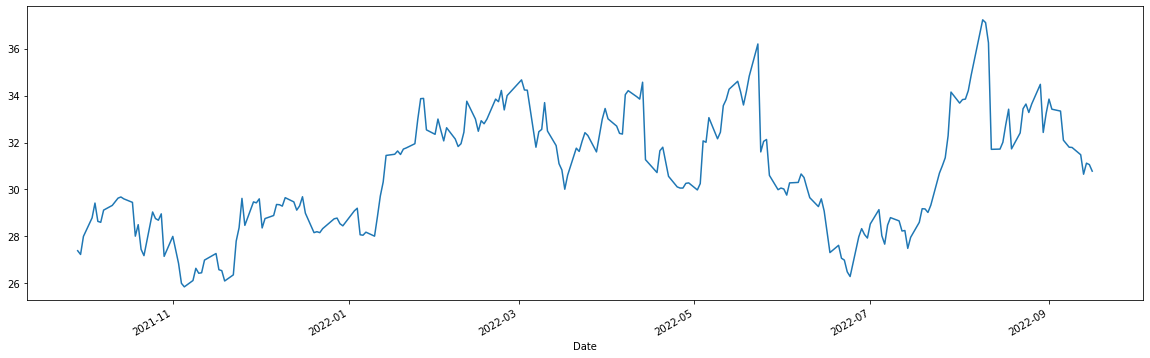

In [20]:
fig, ax = plt.subplots(figsize=(20, 6))
df.Close.plot(ax=ax);
plt.show();

### SMA

In [5]:
df = yf.download('EQTL3.SA', period='5y')
df['SMA_10'] = df['Close'].rolling(10).mean()
df['SMA_200'] = df['Close'].rolling(200).mean()
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


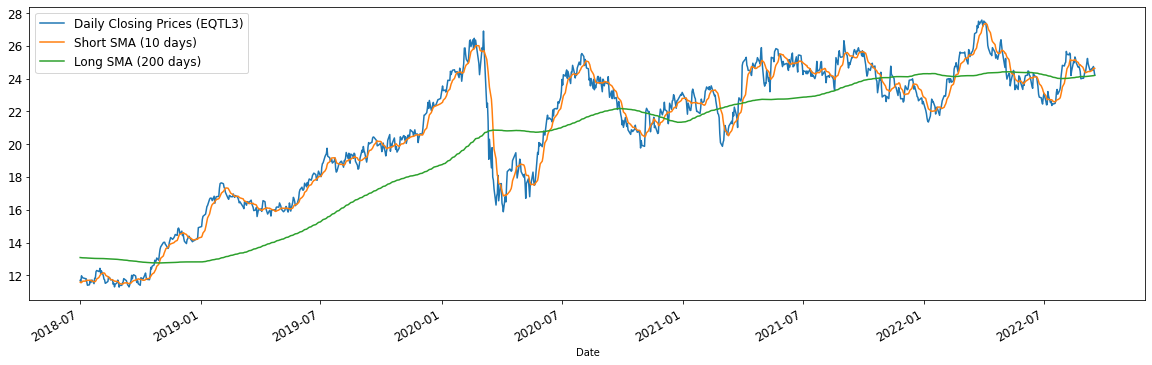

In [6]:
fig, ax = plt.subplots(figsize=(20,6))
df[['Close', 'SMA_10', 'SMA_200']].plot(ax=ax, fontsize=12);
#ax.set_title('SMA vs. EMA on PETR4 Closing Prices')
plt.legend(['Daily Closing Prices (EQTL3)', 'Short SMA (10 days)', 'Long SMA (200 days)'], fontsize=12)
plt.show();

### SMA vs. EMA

In [7]:
df = yf.download('PETR4.SA', period='1y')
df['SMA_10'] = df['Close'].rolling(10).mean()
df['EMA_10'] = ta_lib.trend.ema_indicator(df['Close'], window=10)
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_10
Date,,,,,,,,
2021-09-29,27.209999,27.530001,26.820000,27.389999,16.285601,58731700,26.197,26.556385
2021-09-30,27.530001,27.580000,27.170000,27.230000,16.190470,65744000,26.310,26.678861
2021-10-01,27.120001,28.000000,27.070000,28.000000,16.648298,60983200,26.617,26.919068
2021-10-04,27.760000,28.809999,27.719999,28.790001,17.118017,106937000,27.031,27.259237
2021-10-05,29.000000,29.469999,28.900000,29.420000,17.492603,100469100,27.452,27.652103


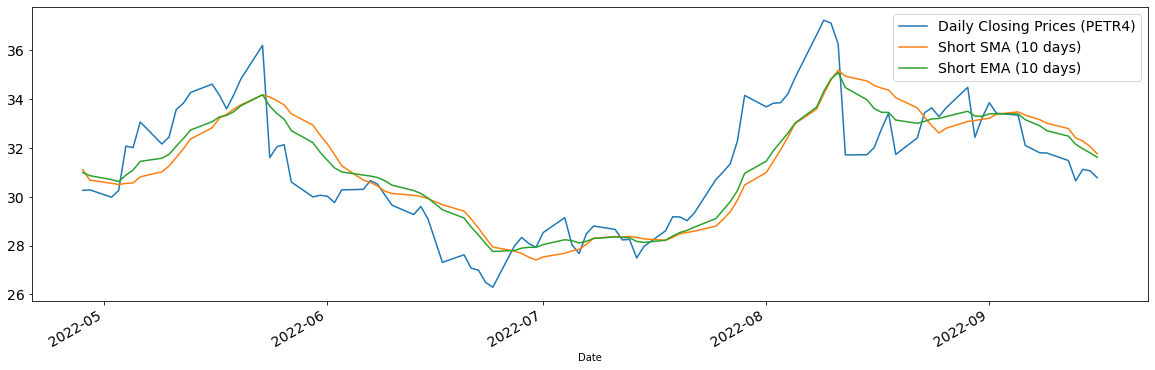

In [9]:
fig, ax = plt.subplots(figsize=(20,6))
df[['Close', 'SMA_10', 'EMA_10']].tail(100).plot(ax=ax, fontsize=14);
#ax.set_title('SMA vs. EMA on PETR4 Closing Prices')
plt.legend(['Daily Closing Prices (PETR4)', 'Short SMA (10 days)', 'Short EMA (10 days)'], fontsize=14)
plt.show();

### Selic vs. IBOV

In [10]:
selic = pd.read_csv('../../data/macro/selic.csv', sep=';')
selic['date'] = pd.to_datetime(selic['date'])
selic['value'] = selic['value'] * 100 * 252
selic.set_index('date', inplace=True)
selic = selic.sort_index(ascending=True)

In [11]:
selic.tail()

,value
date,
2022-07-07,12.357324
2022-07-08,12.357324
2022-07-11,12.357324
2022-07-12,12.357324
2022-07-13,12.357324


In [12]:
selic.loc['2022':].value.mean() / 252 / 100

0.0004298790225563913

In [13]:
ibov = yf.download('^BVSP', period='7y')
ibov

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-09-16,47364.0,48681.0,47364.0,48553.0,48553.0,4320300
2015-09-17,48553.0,49396.0,48082.0,48551.0,48551.0,4184700
2015-09-18,48550.0,48550.0,46928.0,47264.0,47264.0,4381000
2015-09-21,47263.0,47391.0,46425.0,46590.0,46590.0,2601200
2015-09-22,46585.0,46585.0,45276.0,46265.0,46265.0,4193100
...,...,...,...,...,...,...
2022-09-12,112307.0,114160.0,112305.0,113407.0,113407.0,11707100
2022-09-13,113398.0,113400.0,110522.0,110794.0,110794.0,12612500
2022-09-14,110794.0,111504.0,110118.0,110547.0,110547.0,11630900


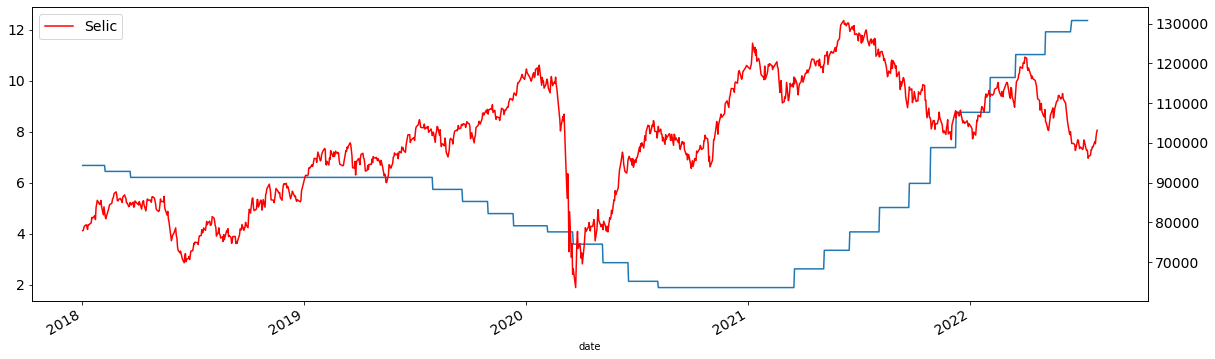

In [14]:
fig, ax1 = plt.subplots(figsize=(20,6), sharex=True)

ax2 = ax1.twinx()

# Selic
selic.loc['2018':'2022-07'].value.plot(ax=ax1, fontsize=14)

# Ibovespa
ibov.loc['2018':'2022-07'].Close.plot(ax=ax2, fontsize=14, color='red')

plt.legend(['Selic', 'Ibovespa'], fontsize=14, loc='upper left')
plt.grid(False)

plt.show();

### Bollinger Bands (BBANDS)

[*********************100%***********************]  1 of 1 completed


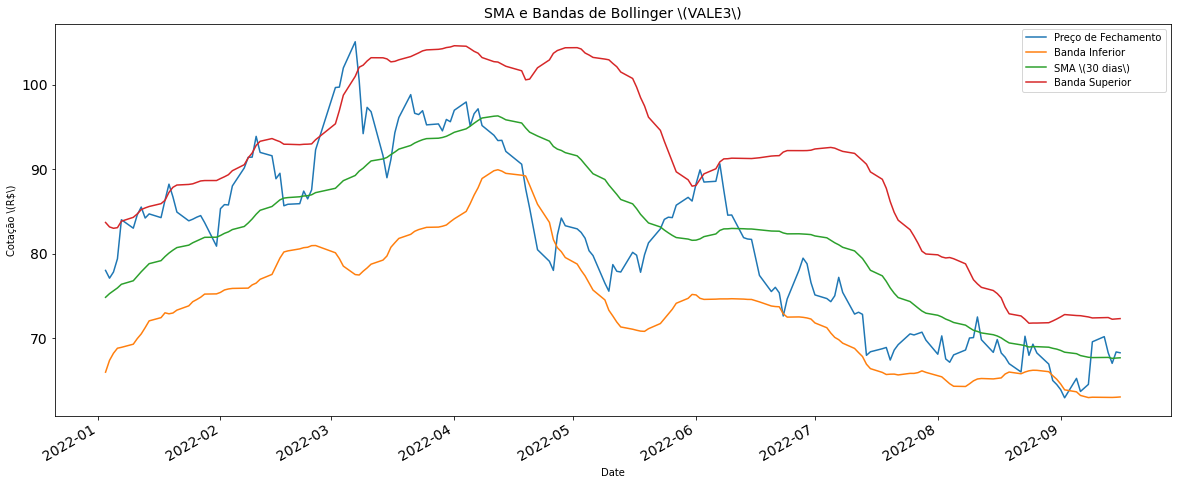

In [15]:
n_days = 30
desvio = 2

data = yf.download('VALE3.SA', period='1y')
data.dropna(inplace=True)

data["SMA"] = data["Close"].rolling(n_days).mean()
data["Lower"] = data["SMA"] - data["Close"].rolling(n_days).std() * desvio # Lower Band -2 Std Dev
data["Upper"] = data["SMA"] + data["Close"].rolling(n_days).std() * desvio # Upper Band +2 Std Dev

data.dropna(inplace=True)

data.loc['2022':][['Close', 'Lower', 'SMA', 'Upper']].plot(figsize=(20,8), fontsize=14)
plt.legend(['Preço de Fechamento', 'Banda Inferior', 'SMA \(30 dias\)', 'Banda Superior'])
plt.title('SMA e Bandas de Bollinger \(VALE3\)', fontsize=14)
plt.ylabel('Cotação \(R\$\)')
plt.show();

### MACD

[*********************100%***********************]  1 of 1 completed


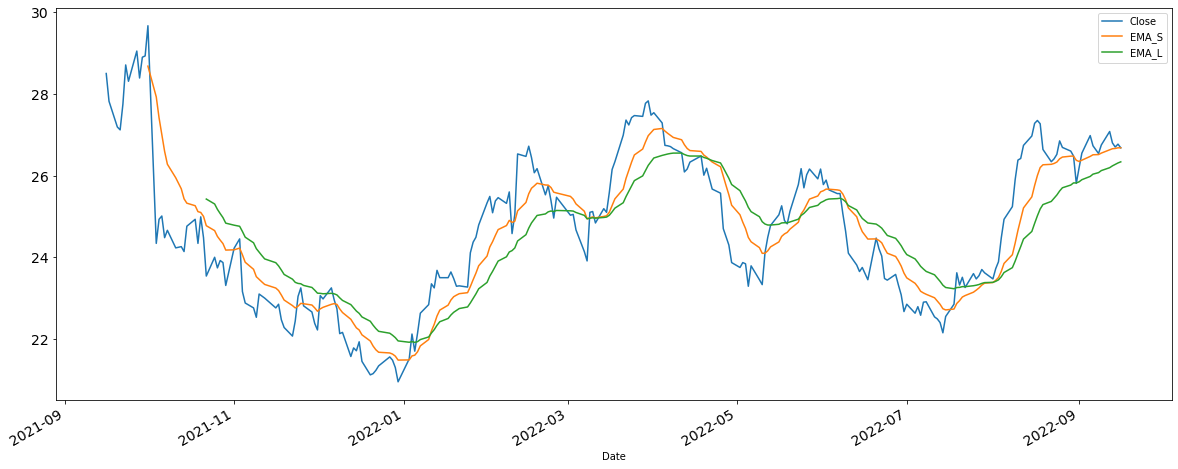

In [16]:
ema_s = 12 # EMA Short
ema_l = 26 # EMA Long

data = yf.download('ITUB4.SA', period='1y')
data.dropna(inplace=True)

data["EMA_S"] = data.Close.ewm(span = ema_s, min_periods = ema_s).mean()
data["EMA_L"] = data.Close.ewm(span = ema_l, min_periods = ema_l).mean()

data["MACD"] = data.EMA_S - data.EMA_L

signal_mw = 9 # Moving Window for Signal Line
data["MACD_Signal"] = data.MACD.ewm(span = signal_mw, min_periods = signal_mw).mean() 

data[["Close", "EMA_S", "EMA_L"]].plot(figsize=(20,8), fontsize=14)
plt.show()

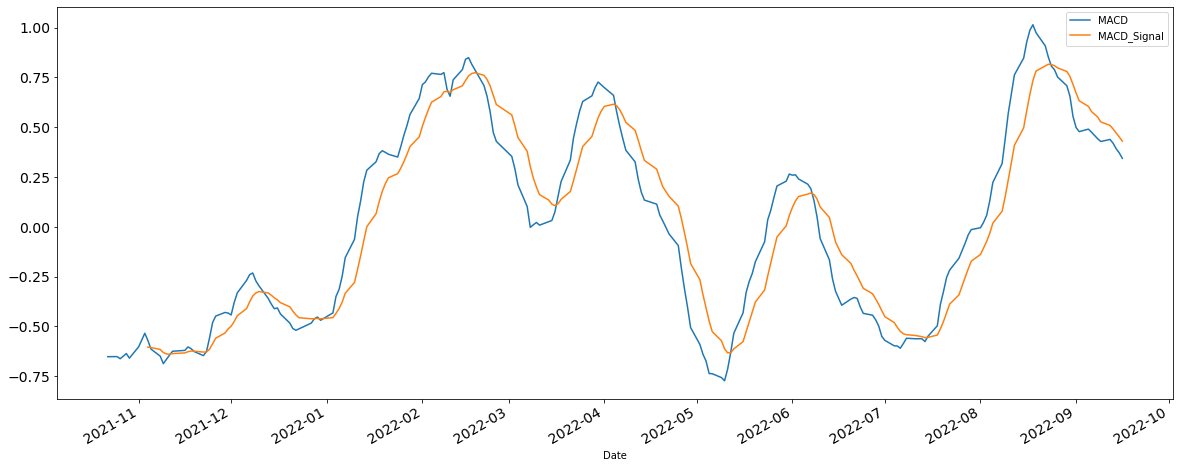

In [17]:
data[["MACD", "MACD_Signal"]].plot(figsize=(20,8), fontsize=14)
plt.show()